In [1]:
%matplotlib inline

In [39]:
import emcee
import autograd.numpy as np
import matplotlib.pyplot as plt
from astropy.stats import LombScargle, median_absolute_deviation
from scipy.optimize import minimize
import glob
from tqdm import tqdm, trange

import celerite
from celerite import terms

from gp import get_rotation_gp

In [64]:
_, y, t = np.genfromtxt('../jradavenport_fwdmodel/lc2.csv', delimiter=',', unpack=True)
m = np.isfinite(t) & np.isfinite(y)
y = y[m][::50]
t = t[m][::50]
yerr = median_absolute_deviation(y) * 1.4

In [84]:
gp_params = np.array([-11.45259997,  -2.50181347,  -8.47622502, -7.37225485, 
                      9.31450214,   0.10572316,   0.27863912,  -0.34240086])

In [85]:
period = 0.9
min_period = period * 0.7
max_period = period / 0.7

gp = get_rotation_gp(t, y, yerr, period, min_period, max_period)

In [86]:
gp.set_parameter_vector(gp_params)
gp.get_parameter_dict()

OrderedDict([('kernel:terms[0]:log_S0', -11.45259997),
             ('kernel:terms[0]:log_omega0', -2.5018134700000001),
             ('kernel:terms[1]:log_sigma', -8.4762250199999993),
             ('kernel:terms[2]:log_a', -7.37225485),
             ('kernel:terms[2]:log_Q1', 9.3145021400000001),
             ('kernel:terms[2]:mix_par', 0.10572316),
             ('kernel:terms[2]:log_Q2', 0.27863912000000002),
             ('kernel:terms[2]:log_P', -0.34240085999999997)])

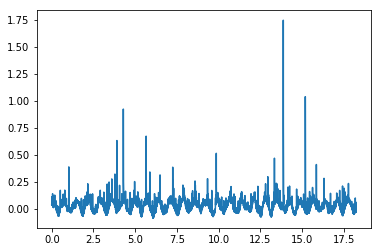

In [87]:
plt.plot(t, gp.sample()+y)
# plt.ylim(-0.02,0.1)
# plt.xlim(35,40)
# plt.xlim(0.5,1)

0.710874464168
0.476181859394


Text(0.5,0,'Period')

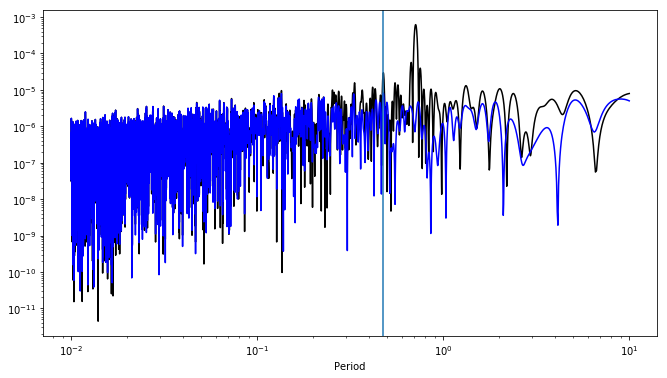

In [88]:
# First guess at the period
fig = plt.figure(figsize=[11,6])

freq = np.linspace(0.1, 100, 50000)
model = LombScargle(t, gp.sample()+y)
power = model.power(freq, method="fast", normalization="psd")
power /= len(t)

period = 1.0 / freq[np.argmax(power)]
print(period)

plt.plot(1.0 / freq, power, "k")

freq = np.linspace(0.1, 100.0, 50000)
model = LombScargle(t, y)
power = model.power(freq, method="fast", normalization="psd")
power /= len(t)

period = 1.0 / freq[np.argmax(power)]
print(period)
plt.plot(1.0 / freq, power, "b")

plt.axvline(period)
plt.xscale("log")
plt.yscale("log")

plt.xlabel('Period')

In [89]:
gp_params[[0,1,2]] = -1.E100
gp.set_parameter_vector(gp_params)
gp.get_parameter_dict()

OrderedDict([('kernel:terms[0]:log_S0', -1e+100),
             ('kernel:terms[0]:log_omega0', -1e+100),
             ('kernel:terms[1]:log_sigma', -1e+100),
             ('kernel:terms[2]:log_a', -7.37225485),
             ('kernel:terms[2]:log_Q1', 9.3145021400000001),
             ('kernel:terms[2]:mix_par', 0.10572316),
             ('kernel:terms[2]:log_Q2', 0.27863912000000002),
             ('kernel:terms[2]:log_P', -0.34240085999999997)])

0.00348934089544
0.00347237941082
0.00347237941082


Text(0.5,0,'Period')

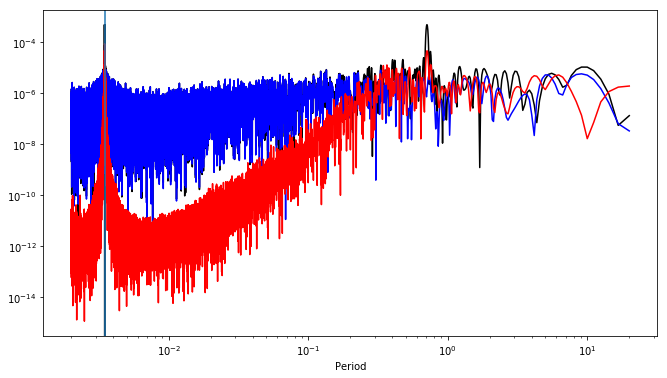

In [175]:
# First guess at the period
fig = plt.figure(figsize=[11,6])

freq = np.linspace(0.05, 500, 50000)
model = LombScargle(t, 1*gp.sample()+y)
power = model.power(freq, method="fast", normalization="psd")
power /= len(t)

period = 1.0 / freq[np.argmax(power)]
print(period)

plt.plot(1.0 / freq, power, "k")

freq = np.linspace(0.05, 500.0, 50000)
model = LombScargle(t, y)
power = model.power(freq, method="fast", normalization="psd")
power /= len(t)

period = 1.0 / freq[np.argmax(power)]
print(period)
plt.plot(1.0 / freq, power, "b")


freq = np.linspace(0.05, 500, 50000)
model = LombScargle(t, 1*gp.sample())
power = model.power(freq, method="fast", normalization="psd")
power /= len(t)

period = 1.0 / freq[np.argmax(power)]
print(period)

plt.plot(1.0 / freq, power, "r")

plt.axvline(period)
plt.xscale("log")
plt.yscale("log")

plt.xlabel('Period')

In [91]:
import aflare

(0, 0.1)

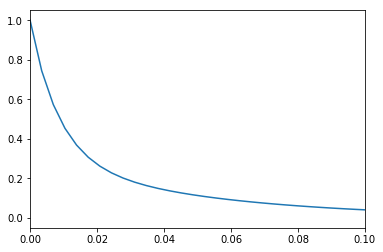

In [178]:
time = t
plt.plot(t,aflare.aflare1(t, time[0], 20/1440, 1))




plt.xlim(0,0.1)

In [93]:
flare_temp = aflare.aflare1(t, time[0], 120/1440, 1) / np.trapz(flare_temp)


flux = gp.sample()+y

In [116]:
designmat = np.ones([np.shape(t)[0], np.shape(t)[0] ])

In [117]:
for i in trange(np.shape(t)[0]-1):
    designmat[i+1] = np.roll(flare_temp, i)
    

100%|██████████| 5255/5255 [00:00<00:00, 28659.04it/s]


In [ ]:
# lamb = 
# lls = np.linalg.lstsq(designmat.T + lamb * np.identity(designmat.shape[0]), y, )


# lls = np.linalg.inv(np.dot(designmat,designmat.T)) * designmat * y

from scipy.sparse.linalg import lsmr
llsout = lsmr(designmat.T, y, )#damp=0.2)

In [ ]:
lls = llsout[0]

In [ ]:
fig = plt.figure(figsize=[11,6])
plt.plot(t, y, lw=5)
plt.plot(t, np.dot(designmat.T, lls))
plt.xlim(0.5,1.5)
plt.ylim(0,0.5)

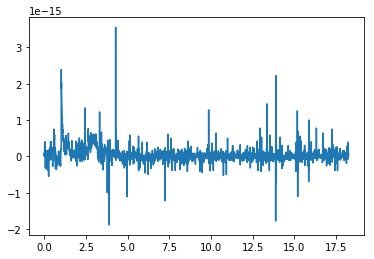

In [38]:
plt.plot(t, y - np.dot(lls,designmat))
# np.dot(lls,designmat)

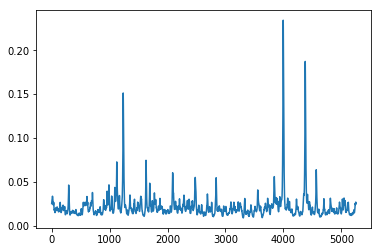

In [166]:
plt.plot(np.dot(designmat.T, lls))